# 教女友学习机器学习0X01——多变量线性回归、特征缩放与多项式回归

上一篇教程只讲了非常基础的内容，线性回归其实高中也学习过了，这一次，我们会略微上升一点难度，我们依然使用Andrew Ng在Coursera上的[机器学习](https://www.coursera.org/learn/machine-learning/)的数据。  

首先导入要用的包：

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
#为了在jupyter上画图加上这句话
%matplotlib inline
from scipy import optimize

引入我们要用的数据

In [3]:
data=np.loadtxt('ex1data2.txt',delimiter=',')
print(data[0:10,:])

[[  2.10400000e+03   3.00000000e+00   3.99900000e+05]
 [  1.60000000e+03   3.00000000e+00   3.29900000e+05]
 [  2.40000000e+03   3.00000000e+00   3.69000000e+05]
 [  1.41600000e+03   2.00000000e+00   2.32000000e+05]
 [  3.00000000e+03   4.00000000e+00   5.39900000e+05]
 [  1.98500000e+03   4.00000000e+00   2.99900000e+05]
 [  1.53400000e+03   3.00000000e+00   3.14900000e+05]
 [  1.42700000e+03   3.00000000e+00   1.98999000e+05]
 [  1.38000000e+03   3.00000000e+00   2.12000000e+05]
 [  1.49400000e+03   3.00000000e+00   2.42500000e+05]]


我们发现数据不一样了，从两列变到三列了，前两列是变量（特征，features），也就是我们所说的x，第三列是y，其实看看图，我们还是能发现一些规律的：

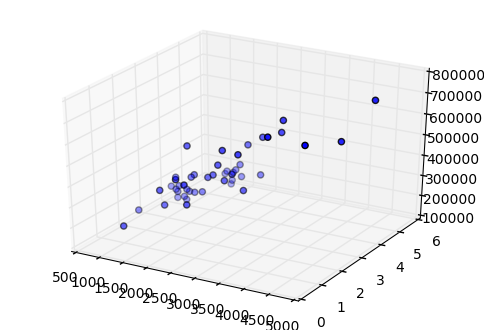

In [10]:
X=data[:,0:2]
y=data[:,2]
m=y.size
#plt.axes([0,0,1,1])
ax=plt.subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y)

貌似我们能用$h_{\theta}(x) = \theta _{0}x_{0}+\theta _{1}x_{1}+\theta _{2}x_{2}$来解决问题，先把数据整理好：

In [11]:
X=np.c_[np.ones(m),X]

接下来，开始上一次教程的前两个步骤，设计预测函数、设计代价函数：

In [12]:
def hypothesis(theta,X):
    return np.dot(X,theta.T)

def computer_cost(theta,X,y):
    return np.sum((y-hypothesis(X,theta))**2)/2/m

看到了没有，矩阵运算就是这么简洁，你变量再多，对我而言就是矩阵相乘，最后来一番优化：

In [27]:
from scipy import optimize
result=optimize.basinhopping(computer_cost,(1,1,1),stepsize=0.1,niter=100,\
                             minimizer_kwargs={'method':'L-BFGS-B','args':(X,y)})
print(result.x)

[ 87976.59551685    139.21115229  -8252.32646683]


看看效果如何：

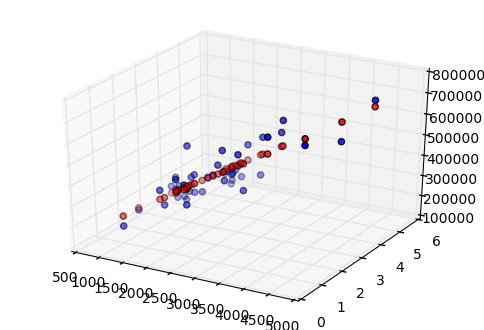

In [25]:
theta=result.x
ax=plt.subplot(111,projection='3d')
ax.scatter(X[:,1],X[:,2],y)
h=hypothesis(theta,X)
ax.scatter(X[:,1],X[:,2],h,c='r')

单一幅静态图可能看不清，来张动图看看：![三维动图](./三维动图.gif)  
可以明显看到，红色的直线拟合得都挺不错的。

## 特征缩放
我发现，如果不提梯度下降、优化算法，说到特征缩放这件事还挺别扭的，所以Andrew Ng在前面说梯度下降还是有道理的，这里简单说一下吧，对于一些优化算法（尤其是基本的），如果不同维度（变量、特征）的数值范围差异很大，就比如我们上面的一个三维图，作为X的2个维度分别是几和几千，如此大的差异如果用梯度下降，会使得不同方向的下降速度差异很大，收敛速度慢很多，需要更多的迭代才能达到较好的效果，因此需要把不同的特征缩放到同一个范围内，通常是控制在±1左右，当然，变量中极个别数超了也没什么关系。通常我们用的缩放公式是：  
$x=\frac{x-\mu }{\sigma }$  
其中$\mu$代表这个维度的均值，$\sigma$代表这个维度的标准差

In [31]:
def featureNormalize(X):
    mu = np.mean(X,0)
    sigma = np.std(X,0)
    return [(X-mu)/sigma,mu,sigma]

In [37]:
X_normal,mu,sigma = featureNormalize(X[:,1:])
#print(mu,sigma)
X_normal=np.c_[np.ones(m),X_normal]
print(X_normal)

[[  1.00000000e+00   1.31415422e-01  -2.26093368e-01]
 [  1.00000000e+00  -5.09640698e-01  -2.26093368e-01]
 [  1.00000000e+00   5.07908699e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.43677059e-01  -1.55439190e+00]
 [  1.00000000e+00   1.27107075e+00   1.10220517e+00]
 [  1.00000000e+00  -1.99450507e-02   1.10220517e+00]
 [  1.00000000e+00  -5.93588523e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.29685755e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.89466782e-01  -2.26093368e-01]
 [  1.00000000e+00  -6.44465993e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.71822042e-02   1.10220517e+00]
 [  1.00000000e+00  -8.65999486e-04  -2.26093368e-01]
 [  1.00000000e+00  -1.40779041e-01  -2.26093368e-01]
 [  1.00000000e+00   3.15099326e+00   2.43050370e+00]
 [  1.00000000e+00  -9.31923697e-01  -2.26093368e-01]
 [  1.00000000e+00   3.80715024e-01   1.10220517e+00]
 [  1.00000000e+00  -8.65782986e-01  -1.55439190e+00]
 [  1.00000000e+00  -9.72625673e-01  -2.26093368e-01]
 [  1.00000000e+00   7.73743

接下来的方法一样的，优化一下看看啦~

In [39]:
from scipy import optimize
result=optimize.basinhopping(computer_cost,(1,1,1),stepsize=0.1,niter=100,\
                             minimizer_kwargs={'method':'L-BFGS-B','args':(X_normal,y)})
print(result.x)

[ 340412.60323046  109447.81486598   -6578.35076072]
